In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

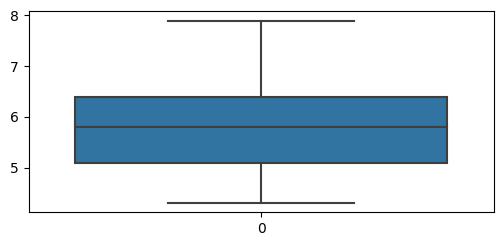

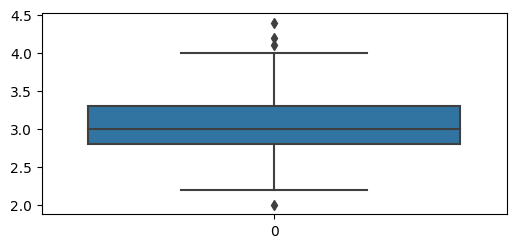

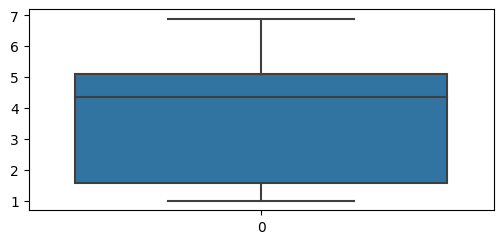

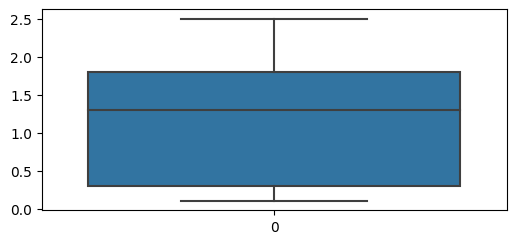

In [23]:
for i,j in enumerate(names):
  plt.figure(figsize=(6,12))
  plt.subplot(4,1,i+1)
  sns.boxplot(df[j])

<Axes: >

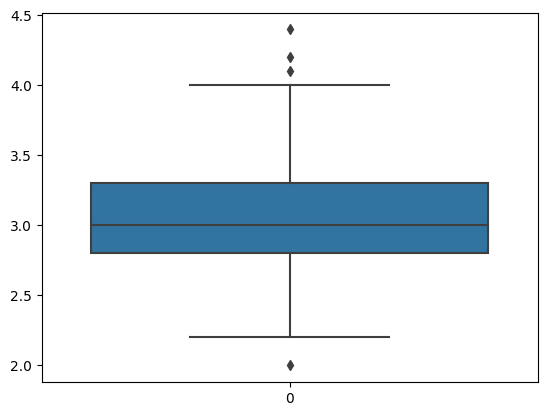

In [24]:
sns.boxplot(df['SepalWidthCm'])

In [25]:
q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3-q1

In [27]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

In [30]:
df['SepalWidthCm'] = np.where(df['SepalWidthCm']>upper_limit, df['SepalWidthCm'].median(), df['SepalWidthCm'])
df['SepalWidthCm'] = np.where(df['SepalWidthCm']<lower_limit, df['SepalWidthCm'].median(), df['SepalWidthCm'])

<Axes: >

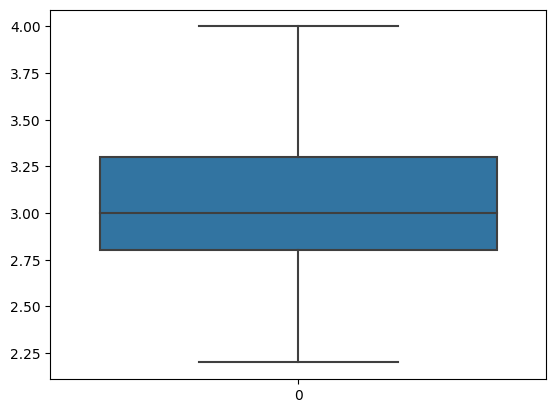

In [31]:
sns.boxplot(df['SepalWidthCm'])

In [83]:
x = df.iloc[:,1:5]
y = df['Species']

In [84]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15,random_state=15)

In [85]:
le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [86]:
ytrain

array([1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2,
       2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0,
       2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 2, 2])

In [87]:
ytest

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       1])

In [88]:
model = Sequential()

In [89]:
model.add(Dense(4,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [91]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [92]:
model.fit(xtrain,ytrain,epochs=15,batch_size=5,validation_data=(xtest,ytest))

Epoch 1/15
26/26 [==============================] - 1s 11ms/step - loss: 1.0904 - accuracy: 0.4646 - val_loss: 0.9928 - val_accuracy: 0.5217
Epoch 2/15
26/26 [==============================] - 0s 4ms/step - loss: 0.8744 - accuracy: 0.6929 - val_loss: 0.8483 - val_accuracy: 0.5217
Epoch 3/15
26/26 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.6929 - val_loss: 0.6828 - val_accuracy: 0.6957
Epoch 4/15
26/26 [==============================] - 0s 4ms/step - loss: 0.5480 - accuracy: 0.7165 - val_loss: 0.5988 - val_accuracy: 0.5217
Epoch 5/15
26/26 [==============================] - 0s 5ms/step - loss: 0.4850 - accuracy: 0.7008 - val_loss: 0.5356 - val_accuracy: 0.6957
Epoch 6/15
26/26 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.7244 - val_loss: 0.4994 - val_accuracy: 0.8696
Epoch 7/15
26/26 [==============================] - 0s 4ms/step - loss: 0.4389 - accuracy: 0.7717 - val_loss: 0.5615 - val_accuracy: 0.5217
Epoch 8/15
26/26 [=

In [93]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((127, 4), (23, 4), (127,), (23,))

In [94]:
ypred = model.predict([[2.5,4.34,5.3,1.3]])

1/1 [==============================] - 0s 163ms/step


In [95]:
ypred

array([[0.39917544, 0.58006245, 0.02076205]], dtype=float32)

In [98]:
a = np.argmax(ypred)
a

1

In [100]:
le.inverse_transform([a])

array(['Iris-versicolor'], dtype=object)